In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read 10x dataset
adata = sc.read_10x_h5("../../Desktop/neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


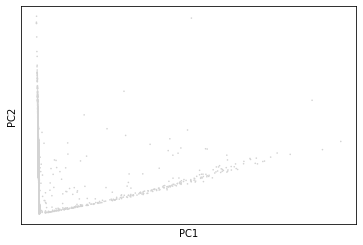

In [3]:
pca_before = sc.tl.pca(adata)
sc.pl.pca(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


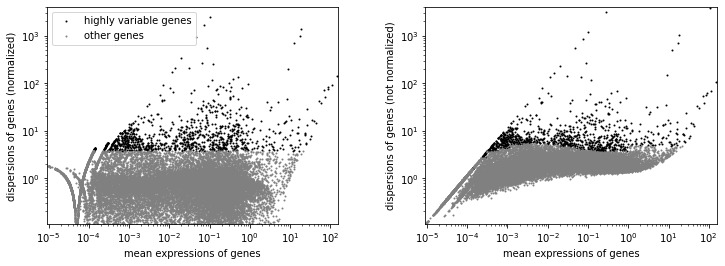

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [4]:
filtered = sc.pp.recipe_zheng17(adata, n_top_genes=1000, log=True, plot=True, copy=True)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


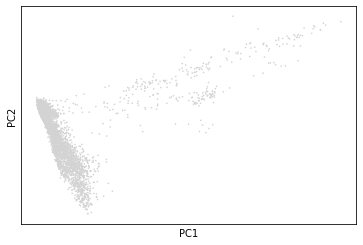

In [31]:
pca_after = sc.tl.pca(filtered)
sc.pl.pca(filtered)

In [6]:
neighbors = sc.pp.neighbors(filtered, copy= True)

In [75]:
cluster = sc.tl.leiden(neighbors, copy = True)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


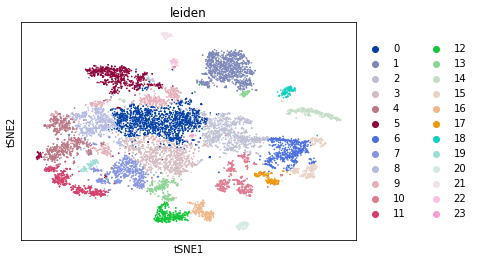

In [23]:
sc.tl.tsne(cluster)
sc.pl.tsne(cluster, color = 'leiden', gene_symbols='gene_ids', color_map = 'magma')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


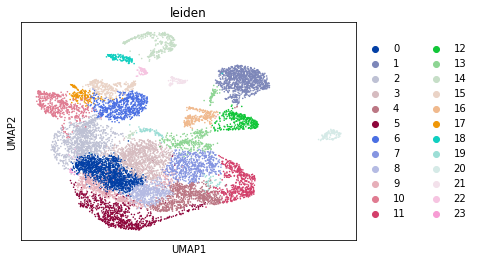

In [22]:
sc.tl.umap(cluster)
sc.pl.umap(cluster, color= 'leiden', gene_symbols='gene_ids', color_map='magma')

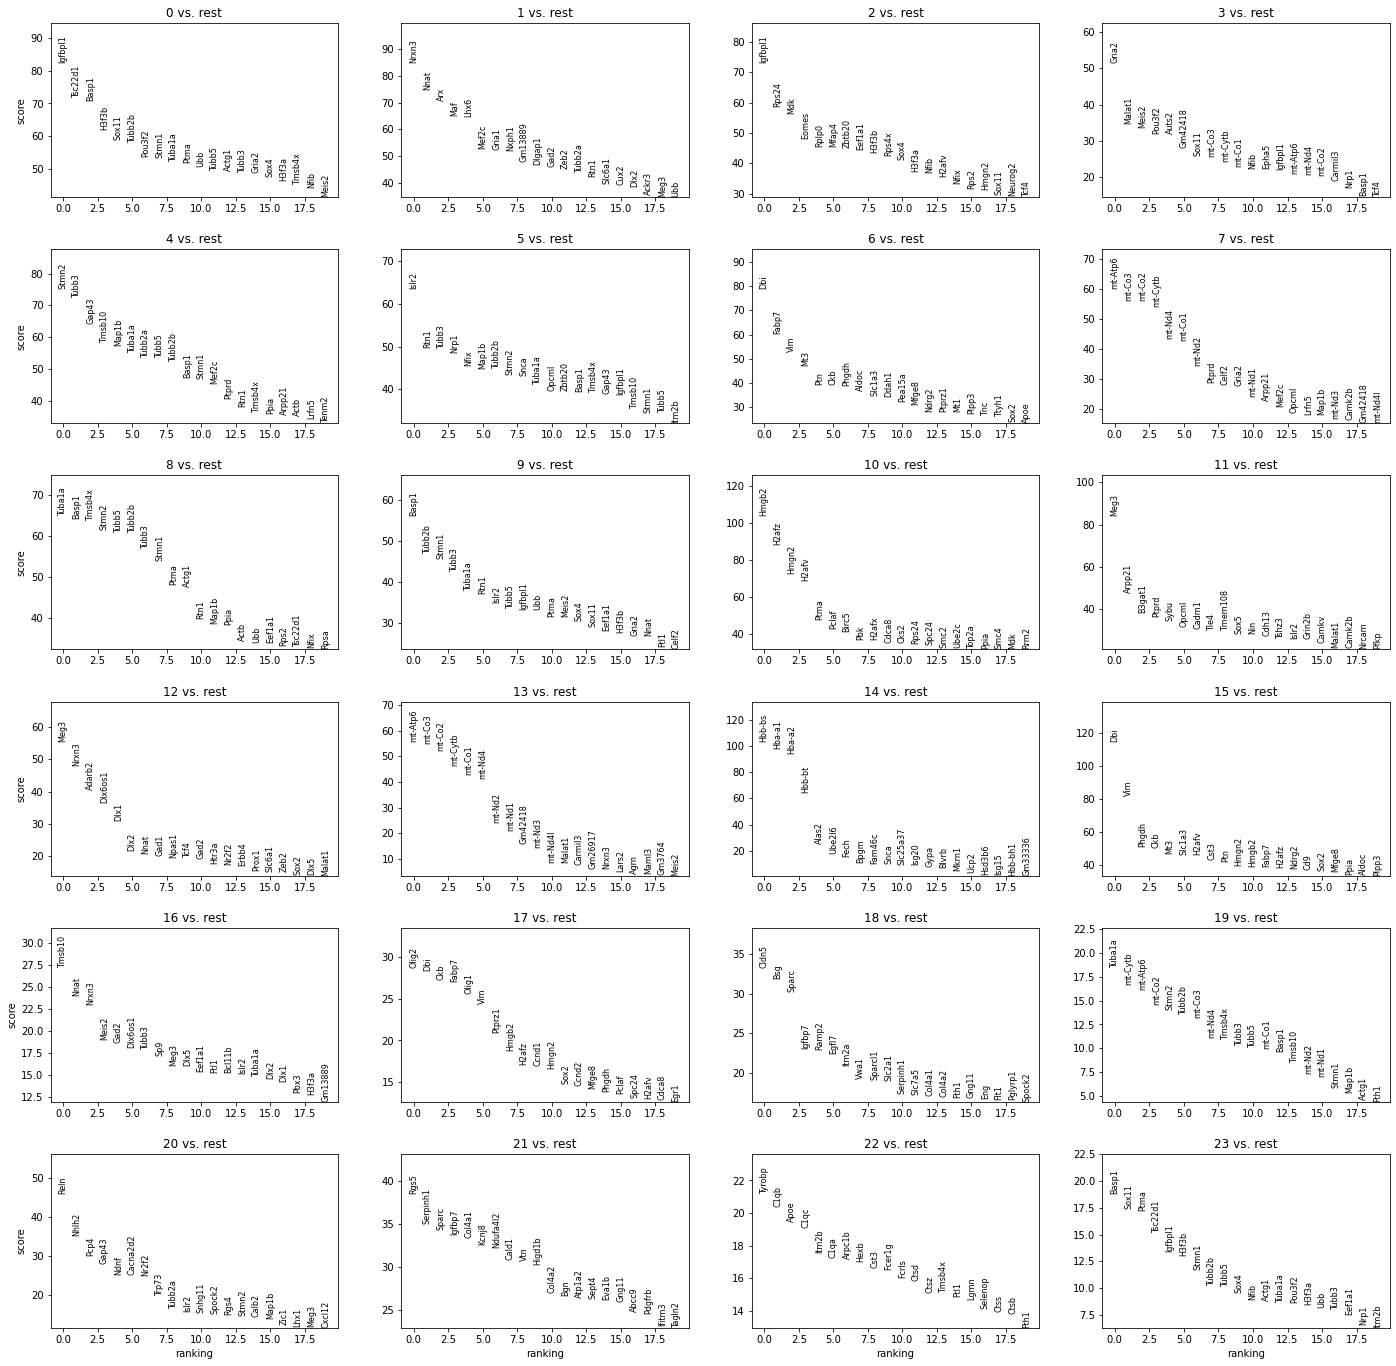

In [79]:
t_test = sc.tl.rank_genes_groups(cluster, 'leiden', copy= True, method = 't-test', key_added= 't-test')
sc.pl.rank_genes_groups(t_test, sharey=False, key = 't-test')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


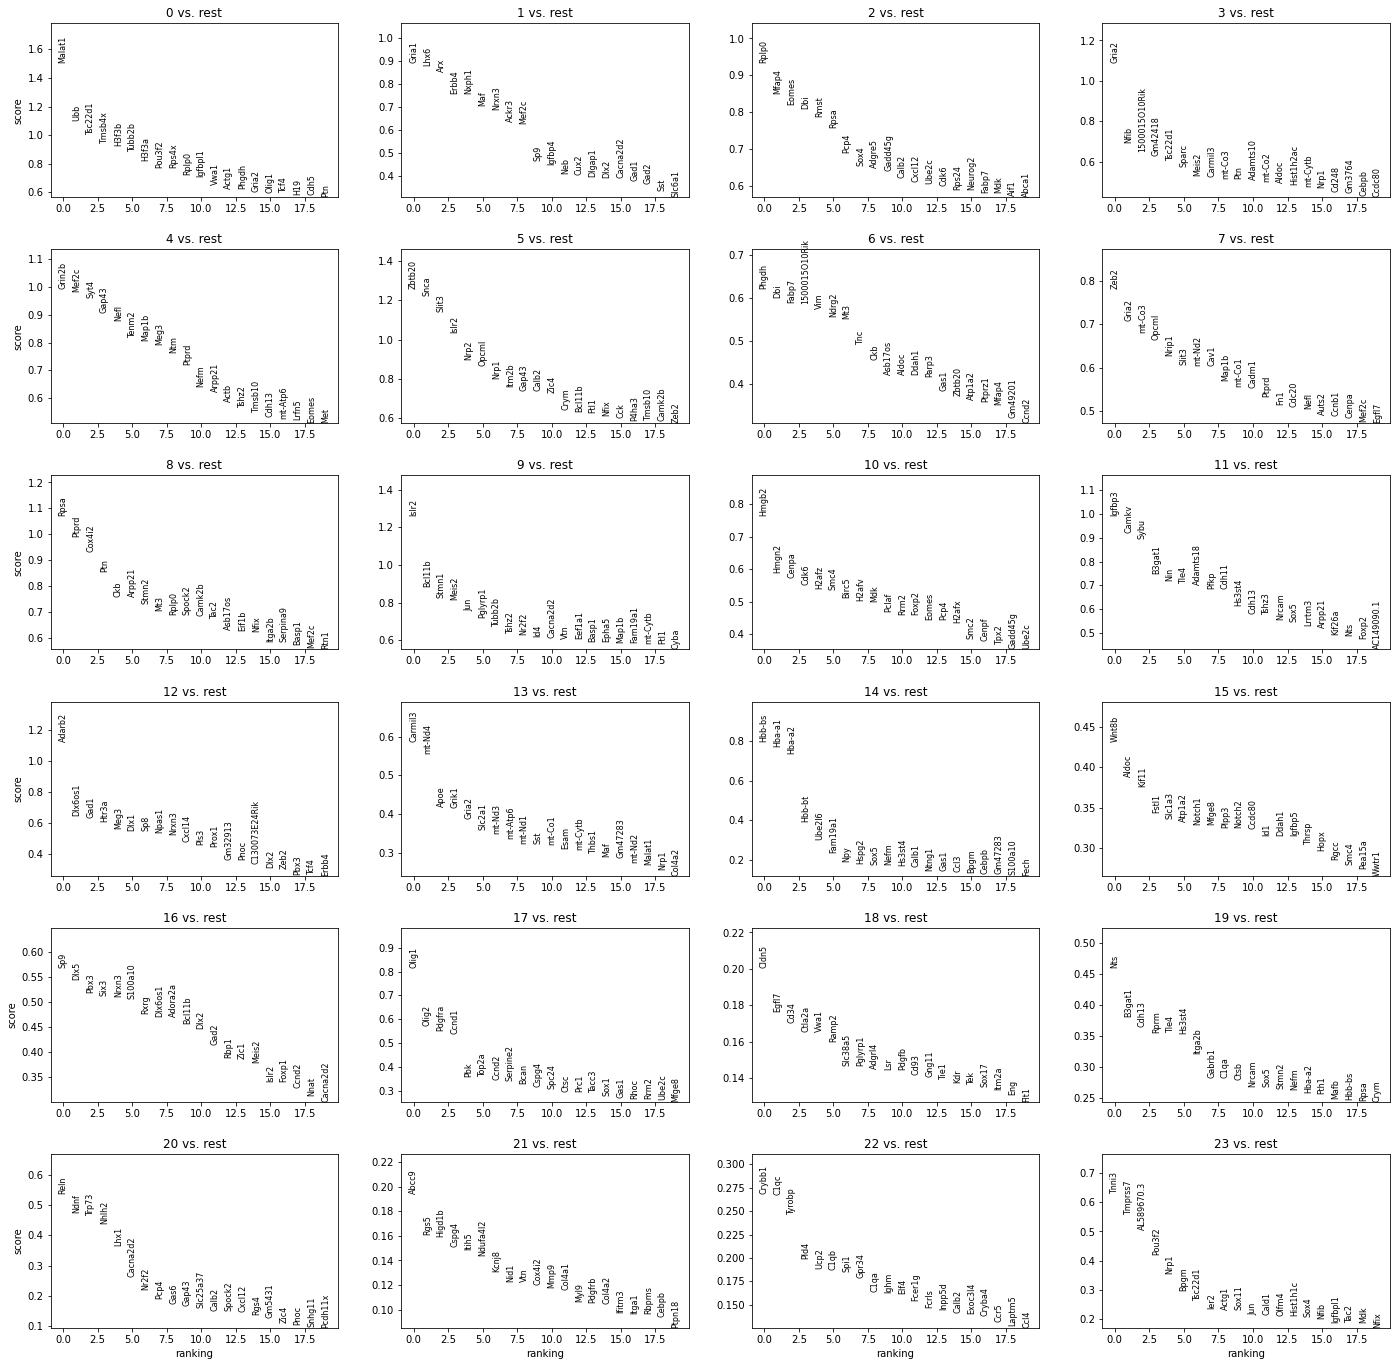

In [16]:
log_reg = sc.tl.rank_genes_groups(cluster, 'leiden', copy= True, method = 'logreg', key_added= 'logreg')
sc.pl.rank_genes_groups(log_reg, sharey=False, key = "logreg")

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


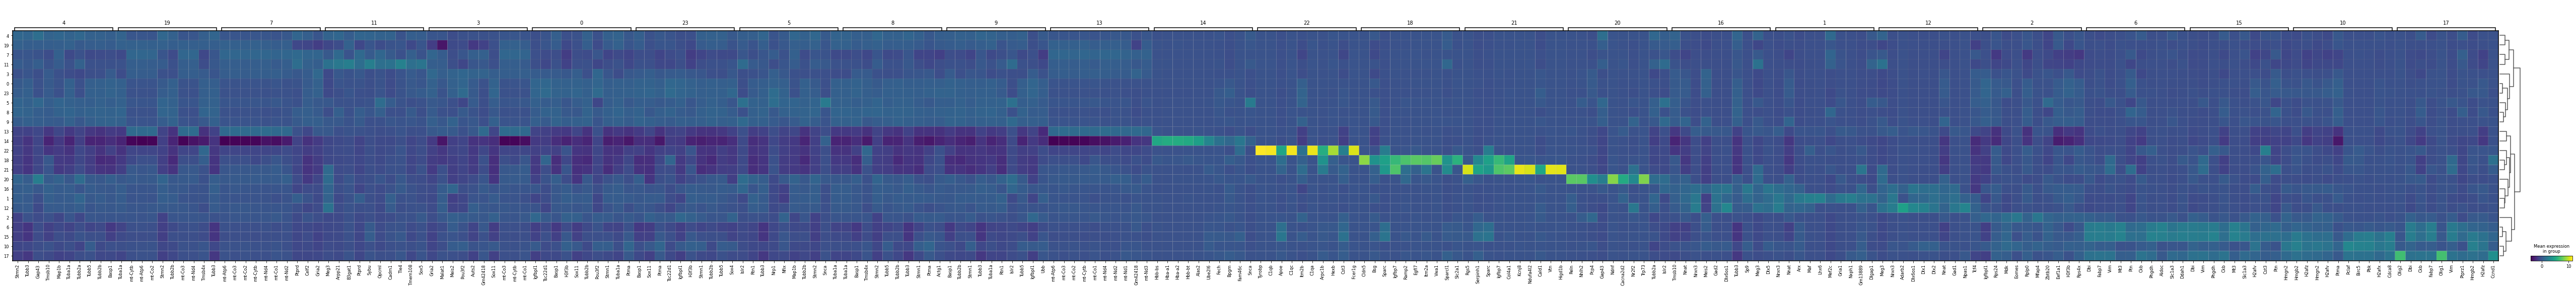

In [109]:
sc.pl.rank_genes_groups_matrixplot(log_reg)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cmdb/miniconda3/envs/scan

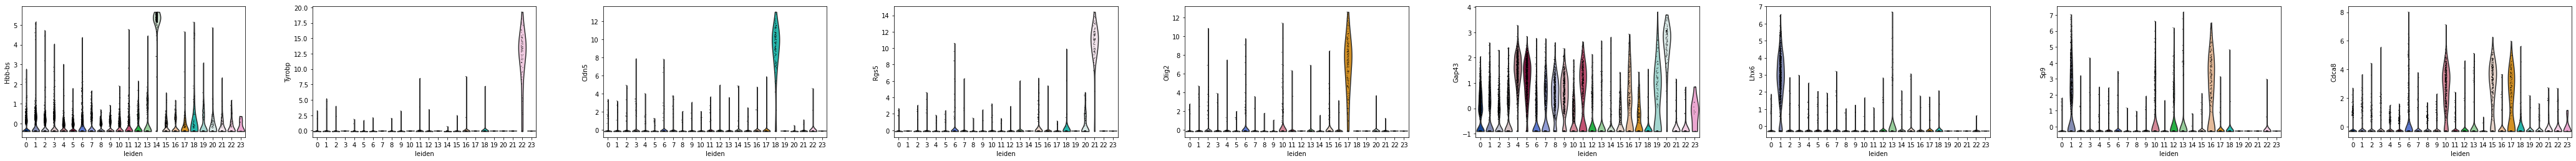

In [103]:
sc.pl.violin(t_test, ['Hbb-bs', 'Tyrobp', 'Cldn5','Rgs5','Olig2', 'Gap43', 'Lhx6','Sp9', 'Cdca8'], groupby = 'leiden', save = True)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


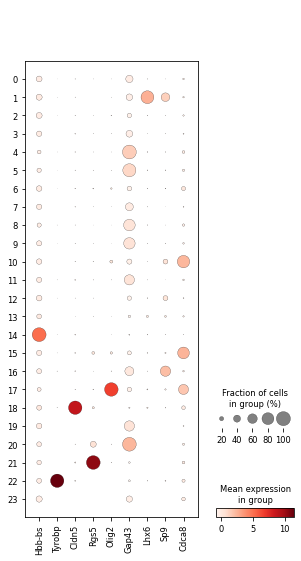

In [106]:
sc.pl.dotplot(t_test, ['Hbb-bs', 'Tyrobp', 'Cldn5','Rgs5','Olig2', 'Gap43', 'Lhx6','Sp9', 'Cdca8'], groupby = 'leiden', save = True)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


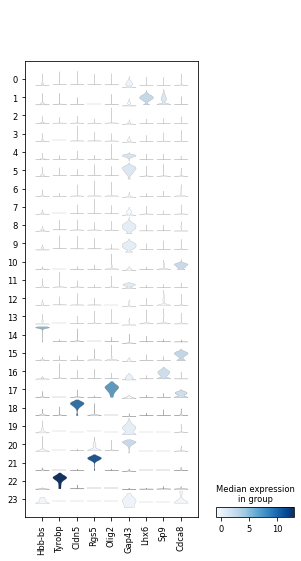

In [107]:
sc.pl.stacked_violin(t_test, ['Hbb-bs', 'Tyrobp', 'Cldn5','Rgs5','Olig2', 'Gap43', 'Lhx6','Sp9', 'Cdca8'], groupby = 'leiden', save = True)

In [120]:
markers = ['Hbb-bs', 'Alas2', 'C1qb', 'Cldn5', 'Rgs5', 'Serpinh1', 'Kcnj8', 'Reln', 'Gap43','Olig2', 'Olig1', 'Lhx6', 'Adarb2', 'Sp9','Cdca8']

In [111]:
new_cluster_names = ['0', 'GABAergic interneuron', '2', '3', '4', '5', '6', '7', '8', '9', 'Intermediate progenitor', '11', '12', '13', 'Erythrocytes', '15', 'Interneuron', 'Oligodendrocyte', 'Endothelial', '19', 'Immature neuron', 'Pericytes', 'Microglia', '23']
log_reg.rename_categories('leiden', new_cluster_names)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


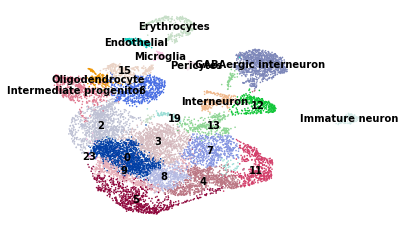

In [115]:
sc.tl.umap(log_reg)
sc.pl.umap(log_reg, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


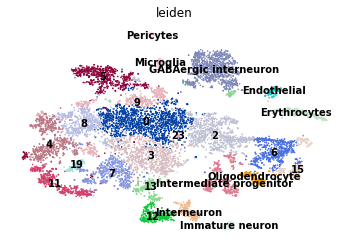

In [116]:
sc.tl.tsne(log_reg)
sc.pl.tsne(log_reg, color = 'leiden', legend_loc = 'on data', frameon = False)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


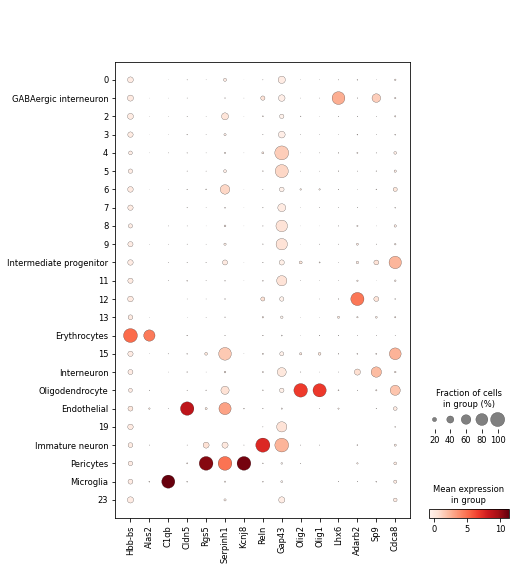

In [121]:
sc.pl.dotplot(log_reg, markers, groupby='leiden')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


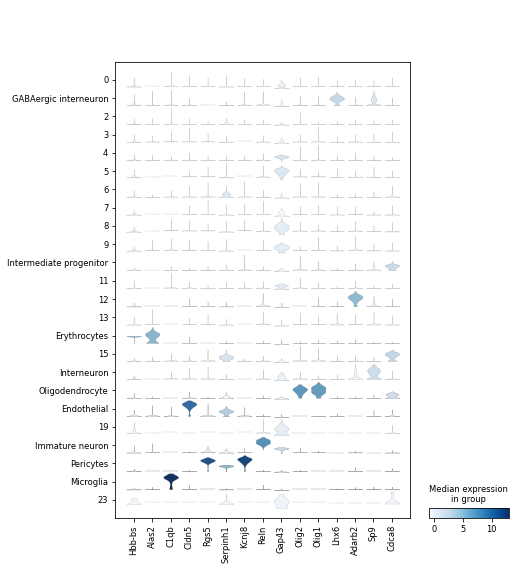

In [122]:
sc.pl.stacked_violin(log_reg, markers, groupby='leiden', rotation=90)